In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
                                # tipo      #coluna    #preserva as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Transformar em um matriz, a transformação vai primeira coluna

In [10]:
from imblearn.over_sampling import SMOTE
st = SMOTE(sampling_strategy='minority')
X, y = st.fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,612.762650,0.626349,43.989211,1.879046,152186.795844,1.000000,1.000000,0.373651,177375.772042
1,0.0,1.0,0.0,651.000000,1.000000,26.000000,5.000000,147037.320000,1.000000,0.000000,0.000000,141763.260000
2,1.0,0.0,0.0,625.220950,0.000000,38.836796,4.039261,0.000000,2.679754,0.679754,1.000000,100650.382727
3,1.0,0.0,0.0,432.000000,1.000000,42.000000,9.000000,152603.450000,1.000000,1.000000,0.000000,110265.240000
4,0.0,1.0,0.0,804.794031,0.001420,44.985795,9.000000,116582.223659,1.000000,1.000000,0.000000,189427.987504


In [13]:
sc = StandardScaler()
X_train[:,[3, 5, 6, 7, 8, 11]] = sc.fit_transform(X_train[:,[3, 5, 6, 7, 8, 11]])
X_test[:,[3, 5, 6, 7, 8, 11]] = sc.transform(X_test[:,[3, 5, 6, 7, 8, 11]])

In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,-0.387742,0.626349,0.286116,-1.141830,1.146193,-0.846336,1.000000,0.373651,1.353625
1,0.0,1.0,0.0,0.027865,1.000000,-1.507098,0.010149,1.062529,-0.846336,0.000000,0.000000,0.733262
2,1.0,0.0,0.0,-0.252331,0.000000,-0.227491,-0.344471,-1.326408,1.915438,0.679754,1.000000,0.017085
3,1.0,0.0,0.0,-2.352479,1.000000,0.087826,1.486593,1.152963,-0.846336,1.000000,0.000000,0.184573
4,0.0,1.0,0.0,1.699476,0.001420,0.385459,1.486593,0.567720,-0.846336,1.000000,0.000000,1.563572


In [15]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.168596,0.831404,0.000000,0.615680,0.831404,1.219103,1.544551,0.418965,2.164775,0.831404,0.000000,-1.242723
1,0.000000,1.000000,0.000000,-1.196027,0.000000,-0.345767,0.438652,0.553925,1.154197,1.000000,0.594415,0.278945
2,0.000000,1.000000,0.000000,0.158295,1.000000,0.785606,0.748371,0.560709,2.441973,1.000000,1.000000,-0.266713
3,1.000000,0.000000,0.000000,0.294327,0.434679,1.093415,0.636148,1.235621,-0.846336,0.565321,0.000000,-0.223519
4,0.298458,0.000000,0.701542,-1.105340,0.701542,0.587777,0.560969,-1.326408,-0.846336,0.298458,1.000000,0.814536


In [16]:
# Criando um modelo sequencial
ann = tf.keras.models.Sequential()

In [17]:
# Adicionando a primeira camada oculta
# - 'units=6': 6 neurônios na camada
# - 'activation="relu"': Função de ativação ReLU para introduzir não-linearidade
# Esta camada terá como entrada o número de features (dimensão das variáveis independentes)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [18]:
# Adicionando a camada de saída
# - 'units=1': Um único neurônio porque o problema é de classificação binária
# - 'activation="sigmoid"': Retorna um valor entre 0 e 1 (probabilidade)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
# Compilando o modelo com o otimizador 'adam', função de perda 'binary_crossentropy' e a métrica de 'accuracy'
ann.compile(
    optimizer = 'adam',  # O otimizador 'adam' é usado para ajustar os pesos do modelo de forma eficiente, considerando gradientes e momento.
    loss = 'binary_crossentropy',  # A função de perda 'binary_crossentropy' é adequada para problemas de classificação binária (dois rótulos: 0 ou 1).
    metrics = ['accuracy']  # 'accuracy' será monitorada durante o treinamento, calculando a proporção de previsões corretas.
)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
# Treinando o modelo com os dados de treinamento (X_train e y_train) por 100 épocas e usando lotes de 32 amostras por vez
ann.fit(
    X_train,  # Dados de entrada (features) para o treinamento.
    y_train,  # Rótulos ou valores verdadeiros correspondentes às amostras de X_train.
    batch_size = 32,  # O modelo será treinado usando lotes de 32 amostras por vez.
    epochs = 100  # O modelo será treinado por 100 épocas (iterações completas sobre o conjunto de treinamento).
)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.5550 - loss: 0.6853
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7292 - loss: 0.5580
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7574 - loss: 0.5187
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7582 - loss: 0.5031
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7758 - loss: 0.4834
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7807 - loss: 0.4698
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7859 - loss: 0.4618
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7892 - loss: 0.4567
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7873 - loss: 0.4479
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7954 - loss: 0.4450
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8021 - loss: 0.4335
Epoch 12/100
399/39

In [22]:
bob = np.array([[600,'France', "Male", 40, 3, 60000, 2, 1, 1, 50000]])
bob[:, 2] = le.transform(bob[:, 2])
bob = ct.transform(bob)
bob[:, [0,3,4,5,6,9]] = sc.transform(bob[:, [0,3,4,5,6,9]])
bob = bob.astype(float)
print(ann.predict(bob)>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[ True]]


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


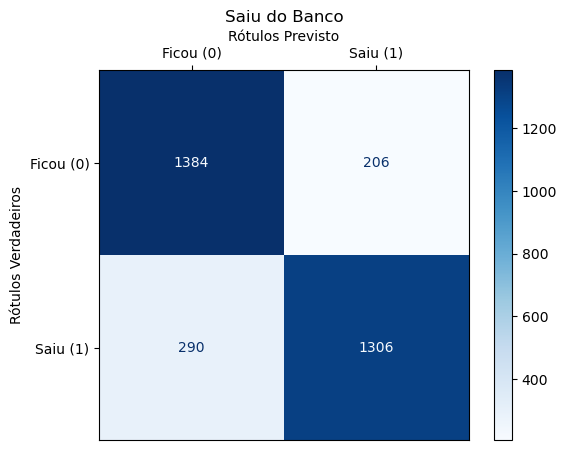

Acurácia: 84.43%


In [24]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Ficou (0)', 'Saiu (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Saiu do Banco")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")